In [1]:
# This example demonstrates the concepts of bias, variance, and model complexity using polynomial regression.
# The main code is inspired by "https://gist.github.com/fabgoos/6788818".

import numpy as np
import pylab as pl
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm

In [3]:
def fit_polynomial(x, y, degree):
    '''
    Fits a polynomial regression model to the input data.
    
    Parameters:
        x: Input feature values
        y: Target values
        degree: Polynomial degree
        
    Returns:
        model: Trained linear regression model with polynomial features.
    '''
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)  # Use Vandermonde matrix to create polynomial features
    return model

def apply_polynomial(model, x):
    '''
    Uses the trained polynomial model to make predictions.
    
    Parameters:
        model: Trained polynomial regression model
        x: New input values
        
    Returns:
        y: Predicted values
    '''
    degree = model.coef_.size - 1  # Get the polynomial degree from model coefficients
    y = model.predict(np.vander(x, degree + 1))  # Generate polynomial features and predict
    return y

def f(size):
    '''
    Generates the true function values (without noise).
    
    Parameters:
        size: Number of points to generate
        
    Returns:
        x: Input feature values
        y: Corresponding function values
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)  # True function without noise
    return (x, y)

def sample(size):
    '''
    Generates a noisy sample of data points.
    
    Parameters:
        size: Number of points to generate
        
    Returns:
        x: Input feature values
        y: Corresponding noisy function values
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5) + 0.5 * pl.randn(x.size)  # Add Gaussian noise
    return (x, y)

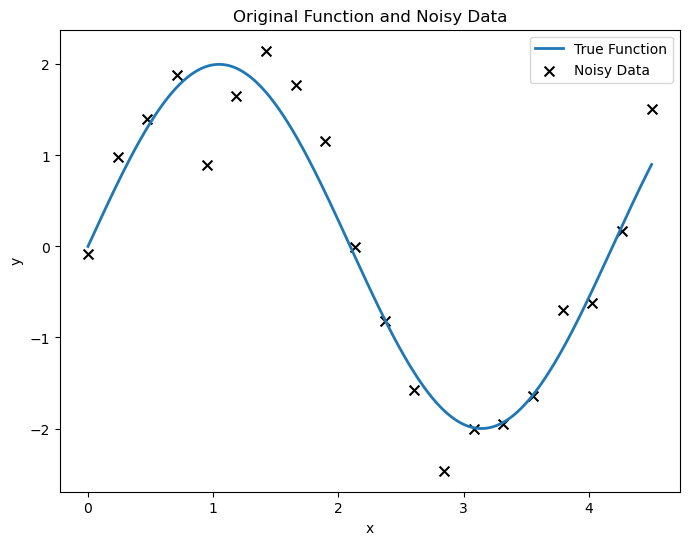

In [5]:
# ----------------------
# Step 1: Generate Training Data
# ----------------------

pl.figure(figsize=(8, 6))
f_x, f_y = f(1000)  # Generate the true function (smooth curve)
pl.plot(f_x, f_y, label="True Function", linewidth=2)  

x, y = sample(20)  # Generate noisy sample points
pl.scatter(x, y, color='black', label="Noisy Data", marker='x', s=50)

pl.xlabel("x")
pl.ylabel("y")
pl.title("Original Function and Noisy Data")
pl.legend()
pl.show()


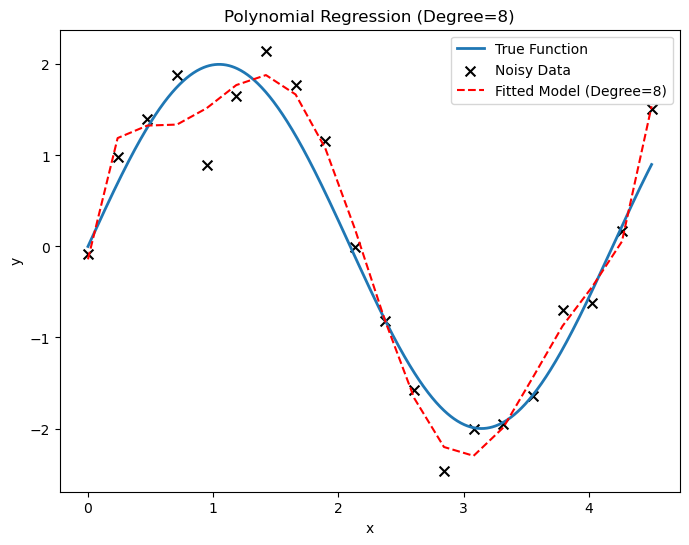

In [7]:
# ----------------------
# Step 2: Fit a Polynomial Model (Degree = 8)
# ----------------------

model = fit_polynomial(x, y, 8)  # Train an 8th-degree polynomial model
p_y = apply_polynomial(model, x)  # Make predictions

pl.figure(figsize=(8, 6))
pl.plot(f_x, f_y, label="True Function", linewidth=2)
pl.scatter(x, y, color='black', label="Noisy Data", marker='x', s=50)
pl.plot(x, p_y, label="Fitted Model (Degree=8)", color='red', linestyle='dashed')

pl.xlabel("x")
pl.ylabel("y")
pl.title("Polynomial Regression (Degree=8)")
pl.legend()
pl.show()

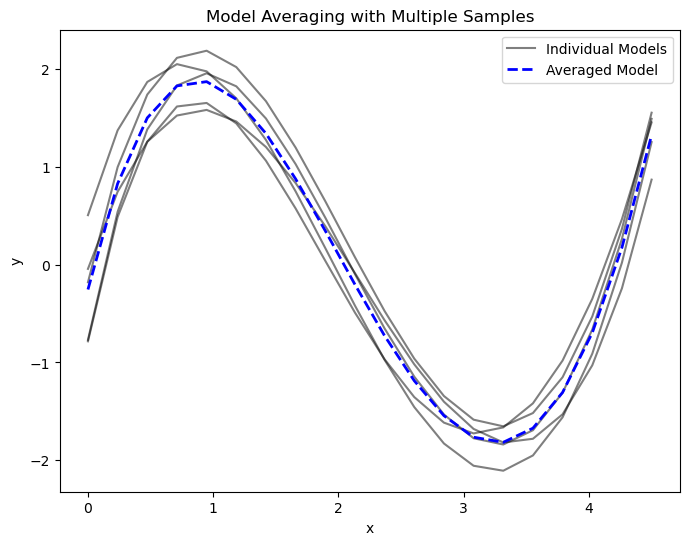

In [9]:
# ----------------------
# Step 3: Model Averaging - Training Multiple Models
# ----------------------

degree = 4  # Use a moderate degree polynomial
n_samples = 20
n_models = 5  # Train multiple models
avg_y = np.zeros(n_samples)

pl.figure(figsize=(8, 6))

for i in range(n_models):
    (x, y) = sample(n_samples)  # Generate a new sample for each model
    model = fit_polynomial(x, y, degree)  # Train the model
    p_y = apply_polynomial(model, x)  # Predict outputs
    avg_y += p_y  # Sum predictions for averaging
    pl.plot(x, p_y, 'k-', alpha=0.5, label="Individual Models" if i == 0 else "")

avg_y = avg_y / n_models  # Compute the average prediction
pl.plot(x, avg_y, 'b--', linewidth=2, label="Averaged Model")

pl.xlabel("x")
pl.ylabel("y")
pl.title("Model Averaging with Multiple Samples")
pl.legend()
pl.show()

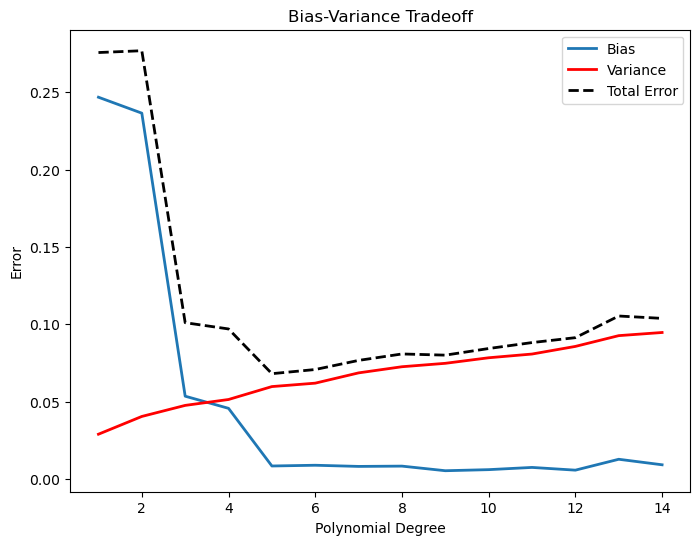

In [11]:
# ----------------------
# Step 4: Calculate Bias, Variance, and Total Error
# ----------------------

n_samples = 20
f_x, f_y = f(n_samples)  # True function values
n_models = 100  # Number of models to train
max_degree = 15  # Maximum polynomial degree

var_vals = []
bias_vals = []
error_vals = []

for degree in range(1, max_degree):
    avg_y = np.zeros(n_samples)
    models = []
    
    # Train multiple models
    for i in range(n_models):
        (x, y) = sample(n_samples)
        model = fit_polynomial(x, y, degree)
        p_y = apply_polynomial(model, x)
        avg_y += p_y
        models.append(p_y)
    
    avg_y = avg_y / n_models  # Compute average prediction
    
    # Calculate squared bias: how far the average prediction is from the true function
    bias_2 = norm(avg_y - f_y) / f_y.size
    bias_vals.append(bias_2)
    
    # Calculate variance: how much predictions vary across models
    variance = 0
    for p_y in models:
        variance += norm(avg_y - p_y)
    variance /= (f_y.size * n_models)
    var_vals.append(variance)
    
    # Total error = bias^2 + variance
    error_vals.append(variance + bias_2)

# ----------------------
# Step 5: Plot Bias-Variance Tradeoff
# ----------------------

pl.figure(figsize=(8, 6))
pl.plot(range(1, max_degree), bias_vals, label='Bias', linewidth=2)
pl.plot(range(1, max_degree), var_vals, color='r', label='Variance', linewidth=2)
pl.plot(range(1, max_degree), error_vals, color='k', label='Total Error', linestyle='dashed', linewidth=2)

pl.xlabel("Polynomial Degree")
pl.ylabel("Error")
pl.title("Bias-Variance Tradeoff")
pl.legend()
pl.show()